In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_for = pd.read_html('https://fbref.com/en/comps/10/shooting/Championship-Stats#all_stats_shooting_against', attrs = {"id" : "stats_squads_shooting_for"})[0]

In [3]:
df_for.columns = ['_'.join(col).strip() for col in df_for.columns.values]
df_for.columns = ['_'.join(col).strip() for col in df_for.columns.values]

In [4]:
df_for.rename(columns = {'U_n_n_a_m_e_d_:_ _0___l_e_v_e_l___0___S_q_u_a_d':'Squad', 'S_t_a_n_d_a_r_d___S_h_/_9_0' : 'Sh/90'},inplace=True)
df_for = df_for[['Squad', 'Sh/90']]

In [5]:
df_against = pd.read_html('https://fbref.com/en/comps/10/shooting/Championship-Stats#all_stats_shooting_against', attrs = {"id" : "stats_squads_shooting_against"})[0]

In [6]:
df_against.columns = ['_'.join(col).strip() for col in df_against.columns.values]
df_against.columns = ['_'.join(col).strip() for col in df_against.columns.values]

In [7]:
df_against.rename(columns = {'U_n_n_a_m_e_d_:_ _0___l_e_v_e_l___0___S_q_u_a_d':'Squad', 'S_t_a_n_d_a_r_d___S_h_/_9_0' : 'ShA/90'},inplace=True)
df_against = df_against[['Squad', 'ShA/90']]

In [8]:
df_for['Squad'] = df_for['Squad'].str.strip()

In [9]:
df_against['Squad'] = df_against['Squad'].str.split('vs').str[1]

In [10]:
df_against['Squad'] = df_against['Squad'].str.strip()

In [11]:
df = pd.merge(df_for, df_against, on='Squad')

In [12]:
df.rename(columns = {'Squad':'Team','Sh/90':'Sh/90 For', 'ShA/90':'Sh/90 Against'},inplace=True)

In [13]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

C:\Users\dmsta\AppData\Local\Temp\ipykernel_18660\1005589737.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


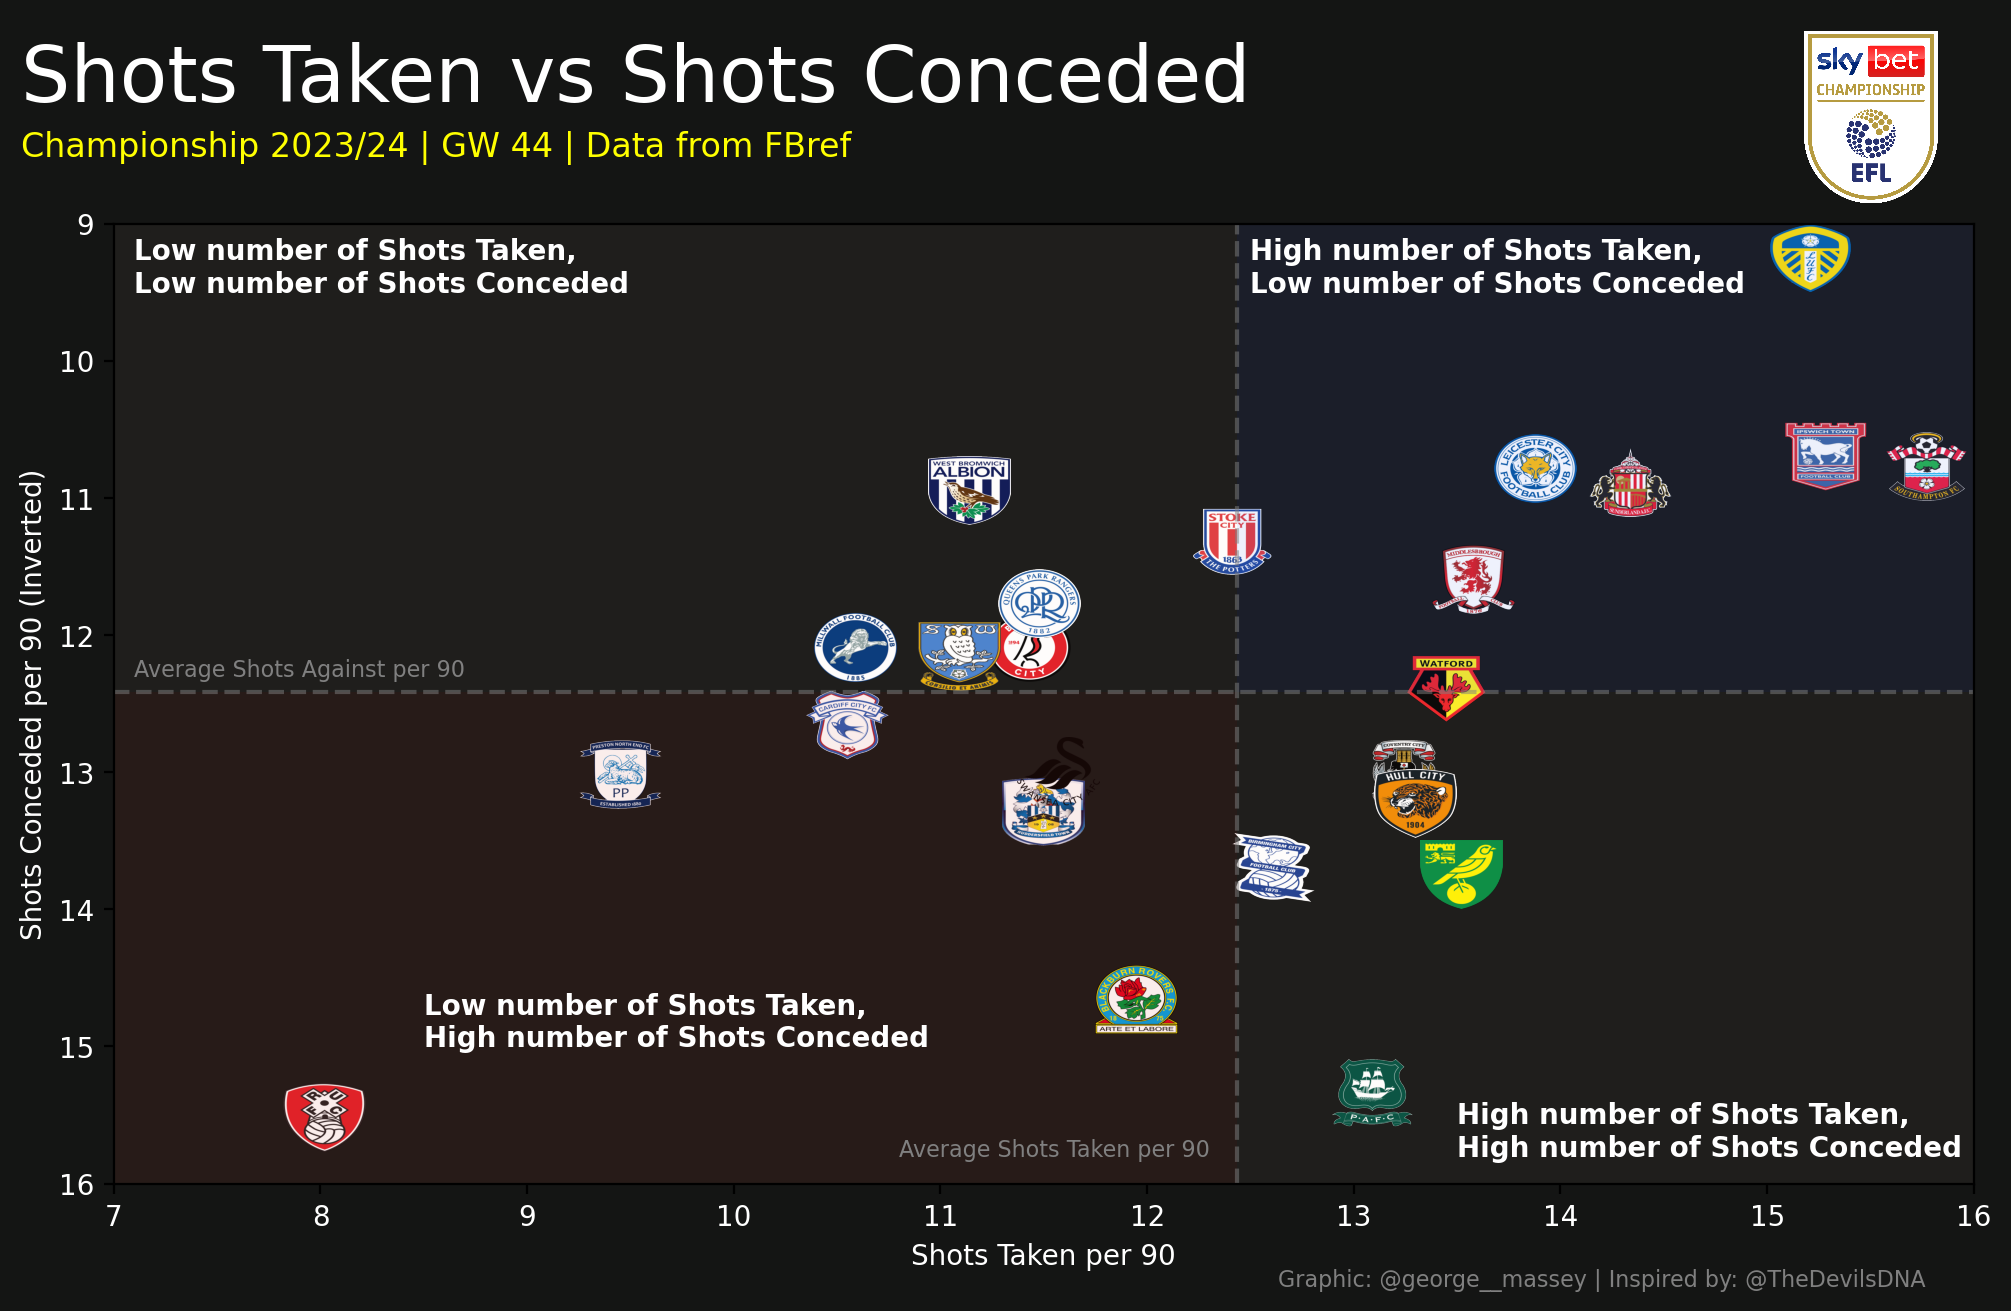

In [14]:
import matplotlib.patches as patches
from PIL import Image

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

# Plot the badge at each point
for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(np.flipud(badge), extent=(team['Sh/90 For']-0.2, team['Sh/90 For']+0.2, team['Sh/90 Against']-0.25, team['Sh/90 Against']+0.25), aspect='auto', origin='upper',alpha=1)

# Add labels and title
plt.xlabel('Shots Taken per 90', color='white')  # Set the xlabel color to white
plt.ylabel('Shots Conceded per 90 (Inverted)', color='white')  # Set the ylabel color to white
plt.yticks([9,10,11,12,13,14,15,16], color='white')  # Set the yticks color to white
plt.xticks([7,8,9,10,11,12,13,14,15,16], color='white')  # Set the xticks color to white
plt.gca().invert_yaxis() # Invert the x-axis
# Adjust the plot limits if needed
# Calculate the average value
average_value = df['Sh/90 Against'].mean()
average_value2 = df['Sh/90 For'].mean()
# Draw a line from the y-axis at the average value
plt.axhline(average_value, color='grey', linestyle='--', alpha=0.5)
plt.axvline(average_value2, color='grey', linestyle='--', alpha=0.5)

# Set the colors for each quadrant
#colors = ['green', 'yellow', 'blue', 'red']
import matplotlib.cm as cm

# Set the colors for each quadrant using a colormap
cmap = cm.get_cmap('coolwarm')
colors = [cmap(0.1), cmap(0.3), cmap(0.6), cmap(0.9)]

# Create the rectangles
rect1 = patches.Rectangle((average_value2, average_value), width = df['Sh/90 For'].max()+2, height=df['Sh/90 Against'].max(), facecolor=colors[2], alpha=0.05)
rect2 = patches.Rectangle((average_value2, 0), width=df['Sh/90 For'].max()+2,height= average_value, facecolor=colors[0], alpha=0.1)
rect3 = patches.Rectangle((df['Sh/90 For'].min()-3, average_value), average_value2 - (df['Sh/90 For'].min()-3), height=df['Sh/90 Against'].max(), facecolor=colors[3], alpha=0.1)
rect4 = patches.Rectangle((df['Sh/90 For'].min()-3, 0), width=average_value2 - (df['Sh/90 For'].min()-3) , height=average_value, facecolor=colors[2], alpha=0.05)

# Add the rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
#plt.xlim(df['Sh/90 For'][::-1])
#plt.ylim(0, df['Sh/90 Against'].max()+50)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant

plt.text(7.1, 9.5, 'Low number of Shots Taken, \nLow number of Shots Conceded', color='white', fontsize=10, weight='bold')
plt.text(12.5, 9.5,'High number of Shots Taken, \nLow number of Shots Conceded', color='white', fontsize=10, weight='bold')
plt.text(13.5, 15.8, 'High number of Shots Taken, \nHigh number of Shots Conceded', color='white', fontsize=10, weight='bold')
plt.text(8.5, 15, 'Low number of Shots Taken, \nHigh number of Shots Conceded', color='white', fontsize=10, weight='bold')
plt.text(7.1,12.3, 'Average Shots Against per 90', color='grey', fontsize=8)
plt.text(10.8,15.8, 'Average Shots Taken per 90', color='grey', fontsize=8)
plt.subplots_adjust(top=0.85, bottom=0.25)
plt.text(-0.05, 1.15, 'Shots Taken vs Shots Conceded', color='white', fontsize=28, transform=plt.gca().transAxes, ha='left', va='center')
plt.text(0.8, -0.1, 'Graphic: @george__massey | Inspired by: @TheDevilsDNA', color='grey', fontsize=8, transform=plt.gca().transAxes, ha='center', va='center')
plt.text(-0.05, 1.08, 'Championship 2023/24 | GW 44 | Data from FBref', color='yellow', fontsize=12, transform=plt.gca().transAxes, ha='left', va='center')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl

# Specify the backend to use (e.g., 'png', 'jpg', 'tiff')
#mpl.use('png')
# Load the image you want to add
logo_image = plt.imread("C:\\Users\\George\\Documents\\Football Analytics\\Images\\Championship_Logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage = OffsetImage(logo_image, zoom=0.04)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box = AnnotationBbox(logo_offsetimage, (0.98, 1.2), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box)

# Make the box invisible, but keep the image visible
logo_box.patch.set_alpha(0)

plt.show()